### claculations with Eichler formuals

In [10]:
import matplotlib.cm as cm
import matplotlib.colors as col

In [11]:
from scipy.integrate import *
from scipy.special import *
from math import *
import numpy as np  
from scipy.constants import *
import matplotlib.pyplot as plt
import cmath as cmt

%matplotlib inline

In [12]:
import scipy.optimize as spopt

In [13]:
from qkit.analysis.circle_fit.circuit import reflection_singleport as rf_p

In [14]:
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage.filters import median_filter

In [15]:
from cpw_resonator import cpw_resonator as cpw

In [16]:
def mask_HW(data, amp_HW, bw, accuracy, Print = False):
    '''this function creates a mask that marks points around the 
    pumpope tone in order to remove them later from raw data
    bw = bandwidth equal to the distance between points in frequency domain'''
    amp_low = amp_HW-accuracy*bw
    amp_high = amp_HW+accuracy*bw
    if Print: 
        print 'f_pump = {} GHz'.format(str(f_p/1e9))
        print r'f_pump - Delta  = {} GHz'.format(str(f_low/1e9))
        print 'f_pump + Delta = {} GHz'.format(str(f_high/1e9))
    m = np.array(data)
    mask_array = []
    for t in range(len(m)):
        if m[t] < amp_low or m[t] > amp_high: mask_array.append(False)
        else: mask_array.append(True)
        #mask_array = m[(m[t] <= f_low) & (m[t] >= f_high)]
    return np.array(mask_array)   

In [17]:
    def _fit_skewed_lorentzian(f_data,amplitude, fr = None, ignoreslope = False):
        '''
        - calculates the linear background slope with the first x and the last x percent of the data points
        as the start value for the fit
        - substracts the linear background from the data set to find the real minimum of the resonance (not identical to the 
        overall minimum if the tilt is large and the internal quality factor is high)
        '''
        
        amplitude = gaussian_filter1d(amplitude,6)
        A1a = np.minimum(amplitude[0],amplitude[-1]) 
        #A3a = -(np.max(amplitude)-np.min(amplitude))       

        if ignoreslope == False:
            m = rf_p._background(f_data, amplitude, 2., gauss_filter = True)      #x = 2.
            tilt = m*f_data-m*f_data[0]              
            A3a = np.max(amplitude-tilt)
            fra = f_data[np.argmax(amplitude-tilt)]
            
        else:
            A3a = np.max(amplitude)
            fra = f_data[np.argmax(amplitude)]
            m = 0.      #starting value is m = 0.
               
        #amp_HW = A3a/2.
        #mask = mask_HW(amplitude, amp_HW, amp_HW, 0.001)
        
        
        if fr != None: fra = fr    
        def residuals(p,x,y):
            A2, A4, Ql = p
            err = y -(A1a+A2*(x-fra)+(A3a+A4*(x-fra))/(1.+4.*Ql**2*((x-fra)/fra)**2))
            return err
        p0 = [m, 0., 1.]
        p_final = spopt.leastsq(residuals,p0,args=(np.array(f_data),np.array(amplitude)))
        A2a, A4a, Qla = p_final[0]
    
        def residuals2(p,x,y):
            A1, A2, A3, A4, fr, Ql = p
            err = y -(A1+A2*(x-fr)+(A3+A4*(x-fr))/(1.+4.*Ql**2*((x-fr)/fr)**2))
            return err
        p0 = [A1a, A2a , A3a, A4a, fra, Qla]
        p_final = spopt.leastsq(residuals2,p0,args=(np.array(f_data),np.array(amplitude)))
        #A1, A2, A3, A4, fr, Ql = p_final[0]
        #print p_final[0][5]
        return p_final[0]

In [18]:
'''def _lorentzfit(f_data, data, ignoreslope = True):
    
    
    def residuals(p,x,y):
            A2, A4, Ql = p
            err = y - (A1a+A2*(x-fra)+ Gamma^2/((x-fra)^2 + Gamma^2))
            err = y -(A1a+A2*(x-fra)+(A3a+A4*(x-fra))/(1.+4.*Ql**2*((x-fra)/fra)**2))
            return err
        p0 = [m, 0., 10000.]
        p_final = spopt.leastsq(residuals,p0,args=(np.array(f_data),np.array(amplitude)))
        A2a, A4a, Qla = p_final[0]
        
        def residuals2(p,x,y):
            A1, A2, A3, A4, fr, Ql = p
            err = y -(A1+A2*(x-fr)+(A3+A4*(x-fr))/(1.+4.*Ql**2*((x-fr)/fr)**2))
            return err
        p0 = [A1a, A2a , A3a, A4a, fra, Qla]
        p_final = spopt.leastsq(residuals2,p0,args=(np.array(f_data),np.array(amplitude)))'''

'def _lorentzfit(f_data, data, ignoreslope = True):\n    \n    \n    def residuals(p,x,y):\n            A2, A4, Ql = p\n            err = y - (A1a+A2*(x-fra)+ Gamma^2/((x-fra)^2 + Gamma^2))\n            err = y -(A1a+A2*(x-fra)+(A3a+A4*(x-fra))/(1.+4.*Ql**2*((x-fra)/fra)**2))\n            return err\n        p0 = [m, 0., 10000.]\n        p_final = spopt.leastsq(residuals,p0,args=(np.array(f_data),np.array(amplitude)))\n        A2a, A4a, Qla = p_final[0]\n        \n        def residuals2(p,x,y):\n            A1, A2, A3, A4, fr, Ql = p\n            err = y -(A1+A2*(x-fr)+(A3+A4*(x-fr))/(1.+4.*Ql**2*((x-fr)/fr)**2))\n            return err\n        p0 = [A1a, A2a , A3a, A4a, fra, Qla]\n        p_final = spopt.leastsq(residuals2,p0,args=(np.array(f_data),np.array(amplitude)))'

In [19]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
color = ['red', 'green', 'blue', 'yellow', 'orange', 'brown']

In [20]:
startcolor        =   'black'
midcolor          =   'blue'
endcolor          =   'white'

In [21]:
c_cmap = col.LinearSegmentedColormap.from_list('olive',[startcolor,midcolor,endcolor], N = 256, gamma = 1.0)
cm.register_cmap(cmap = c_cmap)

In [22]:
font = {'weight' : 'normal', 'size' : 22}
plt.rc('font', **font)
labelsize=28

In [23]:
phi_0 = codata.value('magn. flux quantum')

In [24]:
w = 10e-6
g = 6e-6
l = 2700e-6
Cc = 7.5e-15
res = cpw(w,g,l,Cc)

In [25]:
res.get_values()

Ll = 4.38459342705e-07 H/m
Cl = 1.63650727064e-10 F/m
distributed:
L = 1.1838402253e-09 H
C = 4.41856963074e-13 F
R = 0.247254977366 Ohm
lumped element:
Lr = 9.5958474297e-10 H
Cr = 2.20928481537e-13 F
Rr = 14979288.7616 Ohm

Q_int = 117647.058824 
Q_ext = 1203.22909907 
Q_load = 1191.04772122 

f_res = 10930816676.9 GHz
f_resc = 10749990099.7 GHz 


In [26]:
Ic1 = 2.0e-6
Ic2 = 0.5e-6

Isum = Ic1 + Ic2

d = (Ic1-Ic2)/(Isum)

In [27]:
def I_symmetry(t):
    return Isum*np.abs(np.cos(np.pi*t))

In [28]:
def L_SQUID_sym(t):
    return phi_0/(2.*np.pi*I_symmetry(t))

In [29]:
def I_asymmetry(t):
    return np.abs(np.cos(pi*t))*Isum*(1+(d*np.tan(np.pi*t))**2.)**0.5

In [30]:
def L_SQUID_asym(t):
    return phi_0/(2.*np.pi*I_asymmetry(t))


In [31]:
#mode spectrum
CJ = 50.e-15
Lj =  L_SQUID_sym(0)
kd = 0.5*np.pi/((1.+Lj/(res._L)))

In [32]:
#capacitance fundamental mode
C_0 = 0.5*(res._C)*(1.+np.sin(2.*kd)/(2.*kd))

In [33]:
print C_0/res._C

0.554688355893


In [34]:
#inductance fundamental mode
L_0 = ((kd)**2./(2.*res._L)*(1+np.sin(2.*kd)/(2.*kd)))**(-1.)   

In [35]:
print L_0/res._L

0.902184243178


In [36]:
print 'capacitance:'
print 'Wallraff: total capacitance: C_k =', C_0*10**15, 'fF'
print 'total distributed capacitance: C_cav =', res._C*10**15, 'fF'
print 'lumped element capacitance: C~ =', res._Cr*10**15, 'fF'

capacitance:
Wallraff: total capacitance: C_k = 245.092912387 fF
total distributed capacitance: C_cav = 441.856963074 fF
lumped element capacitance: C~ = 220.928481537 fF


In [37]:
print 'inductance:'
print 'Wallraff: total inductance: L_k =', L_0*10**9, 'nH'
print 'total distributed inductance: L_cav =', res._L*10**9., 'nH'
print 'lumped element inductance: L~ =', res._Lr*10**9., 'nH'
print 'L_SQ (Ic1 =',Ic1*10**6, 'muA) = ', L_SQUID_sym(0)*10**9, 'nH'
print 'L = L~ + L_SQ =', (res._Lr+Lj)*10**9., 'nH'

inductance:
Wallraff: total inductance: L_k = 1.06804199771 nH
total distributed inductance: L_cav = 1.1838402253 nH
lumped element inductance: L~ = 0.95958474297 nH
L_SQ (Ic1 = 2.0 muA) =  0.131642390279 nH
L = L~ + L_SQ = 1.09122713325 nH


In [38]:
fres = 1/(2*np.pi*np.sqrt(L_0*C_0))

In [39]:
print 'Wallraff: resonance frequency: (with SQUID)', fres*10**(-9), 'GHz'

Wallraff: resonance frequency: (with SQUID) 9.83695285989 GHz


In [40]:
print 'coupled frequency (without SQUID):', 10**(-9)/(2*np.pi*sqrt(res._Lr*(res._Cr+Cc))), 'GHz'
print 'coupled frequency (with SQUID):', 10**(-9)/(2*np.pi*sqrt((res._Lr+Lj)*(res._Cr+Cc))), 'GHz'

coupled frequency (without SQUID): 10.7498731145 GHz
coupled frequency (with SQUID): 10.080624255 GHz


In [41]:
res.fres_Wallraff?

In [42]:
def fres_Wallraff(f,L_l,C_l,d,Cc):  
    Lj = phi_0/(2.*np.pi*2.*Ic1*abs(np.cos(np.pi*f)))
    kd = 0.5*pi/((1.+Lj/(L_l*d)))
    L = ((kd)**2/(2.*L_l*d)*(1.+np.sin(2.*kd)/(2.*kd)))**(-1.)
    C = 0.5*(C_l*d)*(1.+np.sin(2.*kd)/(2.*kd))
    return 10**(-9.)/(2.*np.pi*np.sqrt(L*(C+Cc)))

In [43]:
def f_res_phi_s(t):
    return np.sqrt(1./((2.*np.pi)**2.*(res._Lr+L_SQUID_sym(t))*(res._Cr+Cc)))

In [44]:
f1 = np.arange(-0.6,0.6,0.01)
max_freq = np.max(f_res_phi_s(f1)*10**(-9))

print max_freq

10.080624255


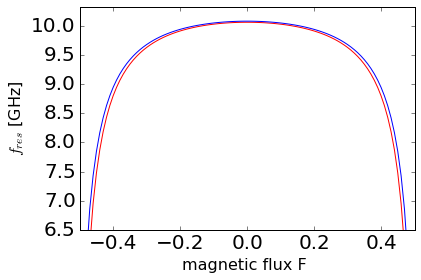

In [45]:
#deviation between eichler/wallraff theory and simple lumped element resonator model
plt.plot(f1,fres_Wallraff(f1,res._Ll,res._Cl,res._l,res._Cc), 'k', label = 'f_res', color = 'red')
plt.plot(f1,f_res_phi_s(f1)*10**(-9), 'k', label = 'f_res', color = 'blue')
plt.xlabel('magnetic flux F ', fontsize = 16)
plt.ylabel(r'$f_{res}$ [GHz]', fontsize = 16)
plt.axis([-0.5,0.5,6.5,max_freq+0.25])
plt.show()





In [46]:

print np.max(fres_Wallraff(f1,res._Ll,res._Cl, res._l,res._Cc))


10.0619806255


In [47]:
Ic1 = 4.0e-6

In [48]:
def fres_Wallraff_multiple(f,L_l,C_l,d,Cc):  
    Lj = 3.*phi_0/(2.*np.pi*2.*Ic1*abs(np.cos(pi*f)))
    kd = 0.5*pi/((1+Lj/(L_l*d)))
    L = ((kd)**2/(2*L_l*d)*(1+np.sin(2*kd)/(2*kd)))**(-1)
    C = 0.5*(C_l*d)*(1+np.sin(2*kd)/(2*kd))
    return 10**(-9)/(2*np.pi*np.sqrt(L*(C+Cc)))

In [49]:
np.max(res.fres_Wallraff(Ic1,Ic1,f1,3))/10**-9.

9.7499261680715674e+18

In [50]:
print np.max(fres_Wallraff_multiple(f1,res._Ll,res._Cl,res._l,res._Cc))

9.74992616807


In [51]:
3.*res.LJ(2.*Ic1)

1.2341474088611285e-10

In [52]:
3.*res.LJ(2.*Ic1)/res._L

0.10424949097699109

In [53]:
LJ = 3.*phi_0/(2.*np.pi*2.*Ic1*abs(np.cos(np.pi*0)))
gamma = LJ/(res._L)

print LJ*10**(9), 'nH'
print gamma

0.123414740886 nH
0.104249490977


In [54]:
##########################################################
################lumped element model:#####################
##########################################################
def f_res_phi_s(t,Ic1):
    I_sym = 2.*Ic1*abs(np.cos(np.pi*t))
    L_SQ = phi_0/(2.*np.pi*I_sym)
    return np.sqrt(1./((2.*np.pi)**2*(res._Lr+L_SQ)*(res._Cr+1.5*res._Cc)))   #factor 1.5 considers parasitic capacitances to ground (finger cap)


def f_res(L_SQ):
    return np.sqrt(1./((2.*np.pi)**2*(res._Lr+L_SQ)*(res._Cr+1.5*res._Cc)))

L_SQ = 0.075*10**(-9)

print 'f_res = ',f_res_phi_s(0,Ic1)*10**(-9), 'GHz'
print 'f_res = ',f_res(L_SQ)*10**(-9), 'GHz'
##########################################################

f_res =  10.4412431579 GHz
f_res =  10.2689517572 GHz


In [55]:
#effective Kerr-nonlinearity
def K(m,n,Lj,L_cav,C_cav):
    PHI_0 = phi_0/(2.*np.pi)
    k_md = 0.5*np.pi*(1.+2.*m)/(1.+Lj/(L_cav))
    k_nd = 0.5*np.pi*(1.+2.*n)/(1.+Lj/(L_cav))
    correction = (1+np.sin(2.*k_md)/(2.*k_md))
    Cm = C_cav/2.*correction
    Lm = ((k_md)**2./(2.*L_cav)*correction)**(-1.)
    wm = 1/np.sqrt(Lm*Cm)
    EJ = (PHI_0)**2./Lj
    phi_zpf = np.sqrt(hbar/(2.*wm*Cm))
    return -EJ/(2.*hbar)*(phi_zpf/PHI_0)**4.*np.cos(k_md)**2.*np.cos(k_nd)**2.

In [56]:
LJ1 = np.arange(50,150,0.01)
L_cav = res._L
C_cav = res._C

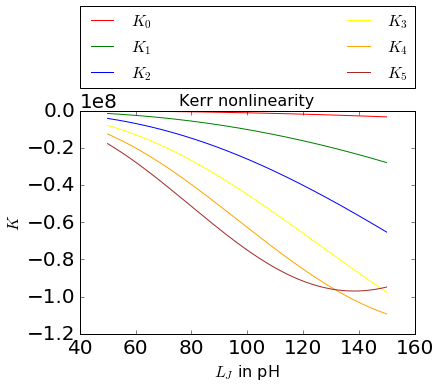

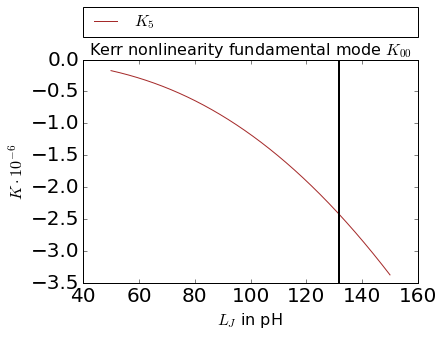

In [57]:
for idx, x in enumerate(my_range(0.,5.,1.)):
    plt.plot(LJ1,K(0,x,LJ1*10**(-12.),L_cav,C_cav), 'k', label = r'$K_{0:.0f}$'.format(x), color = color[idx])
plt.xlabel(r'$L_J$ in pH ', fontsize = 16)
plt.ylabel(r'$K$', fontsize = 16)
plt.title('Kerr nonlinearity', fontsize = 16)
plt.legend(bbox_to_anchor=(0., 1.10, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)
plt.show()


plt.plot(LJ1,K(0,0,LJ1*10**(-12.),L_cav,C_cav)*10**(-6), 'k', label = r'$K_{0:.0f}$'.format(x), color = color[idx])
plt.axvline(x=Lj*10**(12), ymin=0, ymax = 1, linewidth=2, color='k')
plt.xlabel(r'$L_J$ in pH ', fontsize = 16)
plt.ylabel(r'$K \cdot 10^{-6}$', fontsize = 16)
plt.title(r'Kerr nonlinearity fundamental mode $K_{00}$', fontsize = 16)
plt.legend(bbox_to_anchor=(0., 1.10, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)
plt.show()



In [58]:
#################################################################
####################### Quality factor ##########################
#################################################################

print r'Kerr nonlinearity (L_J =',Lj*10**(12), 'pH): K_{00} = ', K(0,0,Lj,L_cav,C_cav)
Z_0 = 50.
kappa_0 = ((2.*pi*fres)**2.*res._Cc**2.*Z_0)/(res._Cc+res._Cr)
Q_0 = 2.*pi*fres/kappa_0

print 'resonator linewidth/decay rate (fundamental mode): kappa_0 =', kappa_0*10**(-6), 'MHz'
print 'quality factor (fundamental mode): Q_0 =', Q_0

Kerr nonlinearity (L_J = 131.642390279 pH): K_{00} =  -2419572.03064
resonator linewidth/decay rate (fundamental mode): kappa_0 = 47.0352216982 MHz
quality factor (fundamental mode): Q_0 = 1314.06625599


In [59]:
#################################################################
####################### input amplitude #########################
#################################################################

alpha_in = -kappa_0**2./(np.sqrt(27)*K(0,0,Lj,L_cav,C_cav))     #squared
print '|alpha_in|^2 = ', alpha_in

|alpha_in|^2 =  175964861.948


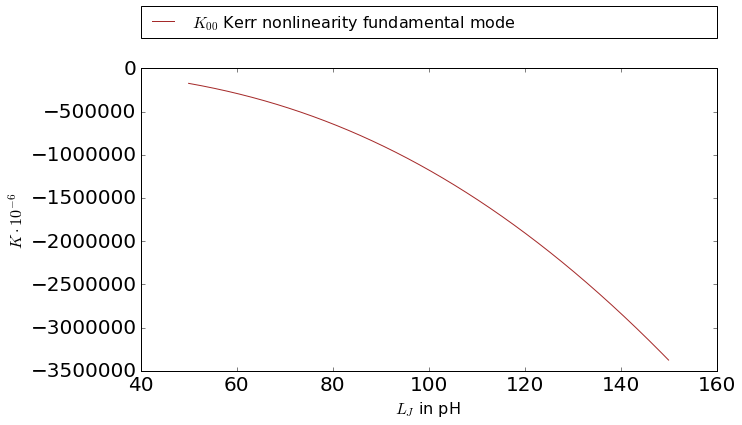

In [60]:
fig, axes = plt.subplots(figsize = (10,6))
axes.set_position([0.1,0.14,0.8,0.7])
axes.plot(LJ1,K(0,0,LJ1*10**(-12.),L_cav,C_cav), 'k', label = r'$K_{00}$ Kerr nonlinearity fundamental mode', color = color[idx])
#plt.axvline(x=Lj*10**(12), ymin=0, ymax = 1, linewidth=2, color='k')
axes.set_xlabel(r'$L_J$ in pH ', fontsize = 16)
axes.set_ylabel(r'$K \cdot 10^{-6}$', fontsize = 16)
#plt.title(r'Kerr nonlinearity fundamental mode $K_{00}$', fontsize = 16)
axes.legend(bbox_to_anchor=(0., 1.10, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)
plt.show()

In [61]:
#number of photons inside cavity
def n1(delta,e1):
    '''delta: signal-pump detuning; e1: effective pump strength'''
    a = e1**2.
    b = -2.*delta*e1
    c = (delta**2.+1./4.)
    d = -1.
    DELTA = 18*a*b*c*d - 4*b**3.*d + (b*c)**2.-4*a*c**3. - 27*(a*d)**2.
    DELTA_0 = b**2. - 3*a*c
    DELTA_1 = 2*b**3.-9*a*b*c + 27*a**2.*d
    arg = np.array(-27.*a**2.*DELTA)
    results = np.sqrt(arg)
    C = ((DELTA_1+results)/2)**(1/3.)
    u1 = 1.
    n = np.array(-1/(3*a)*(b+u1*C+DELTA_0/(u1*C)))
    return n


In [62]:
"""
def n2(d,e):
    a = e**2.
    b = -2*d*e
    c = (d**2.+1./4.)
    d = -1.
    delta = 18*a*b*c*d - 4*b**3.*d + (b*c)**2.-4*a*c**3. - 27*(a*d)**2.
    delta_0 = b**2. - 3*a*c
    delta_1 = 2*b**3.-9*a*b*c + 27*a**2.*d
    C = ((delta_1+np.sqrt(-27.*a**2.*delta))/2)
    u2 = (-1+1.j*np.sqrt(3))/2
    return -1/(3*a)*(b+u2*C+delta_0/(u2*C))

def n3(d,e):
    a = e**2.
    b = -2*d*e
    c = (d**2.+1./4.)
    d = -1.
    delta = 18*a*b*c*d - 4*b**3.*d + (b*c)**2.-4*a*c**3. - 27*(a*d)**2.
    delta_0 = b**2. - 3*a*c
    delta_1 = 2*b**3.-9*a*b*c + 27*a**2.*d
    C = ((delta_1+np.sqrt(-27.*a**2.*delta))/2)
    u3 = (-1+1.j*np.sqrt(3))/2
    return -1/(3*a)*(b+u3*C+delta_0/(u3*C))
"""



'\ndef n2(d,e):\n    a = e**2.\n    b = -2*d*e\n    c = (d**2.+1./4.)\n    d = -1.\n    delta = 18*a*b*c*d - 4*b**3.*d + (b*c)**2.-4*a*c**3. - 27*(a*d)**2.\n    delta_0 = b**2. - 3*a*c\n    delta_1 = 2*b**3.-9*a*b*c + 27*a**2.*d\n    C = ((delta_1+np.sqrt(-27.*a**2.*delta))/2)\n    u2 = (-1+1.j*np.sqrt(3))/2\n    return -1/(3*a)*(b+u2*C+delta_0/(u2*C))\n\ndef n3(d,e):\n    a = e**2.\n    b = -2*d*e\n    c = (d**2.+1./4.)\n    d = -1.\n    delta = 18*a*b*c*d - 4*b**3.*d + (b*c)**2.-4*a*c**3. - 27*(a*d)**2.\n    delta_0 = b**2. - 3*a*c\n    delta_1 = 2*b**3.-9*a*b*c + 27*a**2.*d\n    C = ((delta_1+np.sqrt(-27.*a**2.*delta))/2)\n    u3 = (-1+1.j*np.sqrt(3))/2\n    return -1/(3*a)*(b+u3*C+delta_0/(u3*C))\n'

In [63]:
any?

In [64]:
d1 = np.arange(-2.,1.,0.01)

ecrit = -1/np.sqrt(27)
e1 = 0.5*ecrit
e2 = 0.7*ecrit
e3 = 0.8*ecrit

t = n1(1.0,e3)
print t


nan


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars


In [65]:
def myroot(x):
    root1 = cmt.sqrt(x)
    root2 = -root1
    return root1,root2

In [66]:
def n_arg(delta,e1):
    '''delta: signal-pump detuning; e1: effective pump strength'''
    n = []
    for x in delta:
        a = e1**2.
        b = -2.*x*e1
        c = (x**2.+1./4.)
        d = -1.
        DELTA = 18.*a*b*c*d - 4.*b**3.*d + (b*c)**2.-4.*a*c**3. - 27.*(a*d)**2.
        DELTA_0 = b**2. - 3.*a*c
        DELTA_1 = 2.*b**3.-9.*a*b*c + 27.*a**2.*d
        arg = np.array(-27.*a**2.*DELTA)
        C = (((DELTA_1+myroot(arg))/2.)**(1/3.))
        u1 = 1.
        n.append((-1./(3.*a)*(b+u1*C+DELTA_0/(u1*C))))
    return n

C:\Anaconda2\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


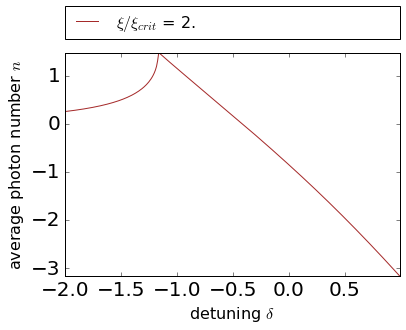

In [67]:
N1 = np.array(n_arg(d1,1.8*ecrit))

#plt.contourf(d1,np.absolute(n_arg(d1,e1)), 'k', label = r'$\xi / \xi_{crit}$ = 0.5', color = 'red')
#plt.plot(d1,n1(d1,e2), 'k', label = r'$\xi / \xi_{crit}$ = 1.', color = 'blue')
plt.plot(d1,N1.T[1], 'k', label = r'$\xi / \xi_{crit}$ = 2.', color = 'brown')
#plt.plot(d1,N1.T[0], 'k', label = r'$\xi / \xi_{crit}$ = 2.', color = 'blue')
plt.xlabel('detuning $\delta$ ', fontsize = 16)
plt.ylabel('average photon number $n$', fontsize = 16)
plt.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)
plt.axis('tight')
plt.show()

In [68]:
test = np.array(1)

In [69]:
test

array(1)

In [70]:
d_test = np.arange(-2.,2., 0.25)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in sqrt
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in power


nan


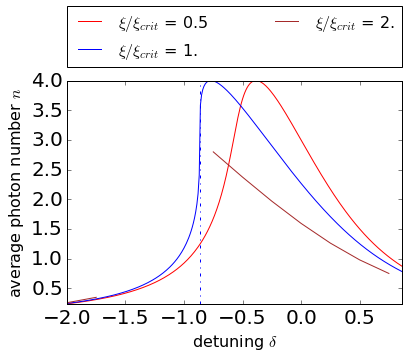

In [71]:

ecrit = -1/np.sqrt(27)
e1 = 0.5*ecrit
e2 = 1.*ecrit
e3 = 2.*ecrit

t = n1(-1.25,e3)
print t

plt.plot(d1,n1(d1,e1), 'k', label = r'$\xi / \xi_{crit}$ = 0.5', color = 'red')
plt.plot(d1,n1(d1,e2), 'k', label = r'$\xi / \xi_{crit}$ = 1.', color = 'blue')
plt.plot(d_test,n1(d_test,e3), 'k', label = r'$\xi / \xi_{crit}$ = 2.', color = 'brown')
plt.xlabel('detuning $\delta$ ', fontsize = 16)
plt.ylabel('average photon number $n$', fontsize = 16)
plt.axvline(-0.86, color = 'blue', ls = '-.')
plt.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)
plt.axis('tight')
plt.show()

In [72]:
def n_test(delta,e1):
    print 'Delta = {}'.format(delta)
    a = e1**2.
    b = -2.*delta*e1
    c = (delta**2.+1./4.)
    d = -1.
    DELTA = 18*a*b*c*d - 4*b**3.*d + (b*c)**2.-4*a*c**3. - 27*(a*d)**2.
    DELTA_0 = b**2. - 3*a*c
    DELTA_1 = 2*b**3.-9*a*b*c + 27*a**2.*d
    print 'arg(sqrt): ', -27.*a**2.*DELTA
    print 'A: ', (DELTA_1+cmt.sqrt(-27.*a**2.*DELTA))/2
    A = (DELTA_1+cmt.sqrt(-27.*a**2.*DELTA))/2
    print A
    if A < 0: C = -(-A)**(1./3.)
    else: C = (A)**(1./3.)
    #C = ((DELTA_1+np.sqrt(-27.*a**2.*DELTA))/2)**(1/3.)
    print 'C = ', C
    print
    u1 = 1.
    n = -1/(3*a)*(b+u1*C+DELTA_0/(u1*C))
    return n

In [73]:
try:
    result = cmt.sqrt(-1)
    print result
except:
    print 'hallo'

1j


In [74]:
'''for delta in d_test:
    a = e1**2.
    b = -2.*delta*e1
    c = (delta**2.+1./4.)
    d = -1.
    DELTA = 18*a*b*c*d - 4*b**3.*d + (b*c)**2.-4*a*c**3. - 27*(a*d)**2.
    DELTA_0 = b**2. - 3*a*c
    DELTA_1 = 2*b**3.-9*a*b*c + 27*a**2.*d
    print 'expression1: ', -27.*a**2.*DELTA
    print
    print 'expression 2: ', (DELTA_1+np.sqrt(-27.*a**2.*DELTA))/2
    A = (DELTA_1+np.sqrt(-27.*a**2.*DELTA))/2.
    if A < 0: C = pow(-A, 1./3.)
    else: C = pow(A, 1./3.)
    print 'C = ', C
    print
    u1 = 1.
    n = -1/(3*a)*(b+u1*C+DELTA_0/(u1*C))
    print 'n:', n'''

"for delta in d_test:\n    a = e1**2.\n    b = -2.*delta*e1\n    c = (delta**2.+1./4.)\n    d = -1.\n    DELTA = 18*a*b*c*d - 4*b**3.*d + (b*c)**2.-4*a*c**3. - 27*(a*d)**2.\n    DELTA_0 = b**2. - 3*a*c\n    DELTA_1 = 2*b**3.-9*a*b*c + 27*a**2.*d\n    print 'expression1: ', -27.*a**2.*DELTA\n    print\n    print 'expression 2: ', (DELTA_1+np.sqrt(-27.*a**2.*DELTA))/2\n    A = (DELTA_1+np.sqrt(-27.*a**2.*DELTA))/2.\n    if A < 0: C = pow(-A, 1./3.)\n    else: C = pow(A, 1./3.)\n    print 'C = ', C\n    print\n    u1 = 1.\n    n = -1/(3*a)*(b+u1*C+DELTA_0/(u1*C))\n    print 'n:', n"

In [75]:
"""kappa = 100.e6        #coupling rate / decay rate
gamma = 100.e6        #loss rate

alpha_in = 
alpha_drive = np.sqrt(kappa)*alpha_in/(kappa+gamma)      #dimensionless drive amplitude: applied input signal (alpha_in) compared to the resonator linewidth


"""



'kappa = 100.e6        #coupling rate / decay rate\ngamma = 100.e6        #loss rate\n\nalpha_in = \nalpha_drive = np.sqrt(kappa)*alpha_in/(kappa+gamma)      #dimensionless drive amplitude: applied input signal (alpha_in) compared to the resonator linewidth\n\n\n'

# gain over pump current and pump-resonator detuning

In [76]:
k = 2*np.pi*100.e6
gamma = 0


def G(k,gamma,d,Delta,epsilon,n):
    lamb_minus = 0.5-np.sqrt((epsilon*n)**2.-(d-2.*epsilon*n)**2.+0.j)
    lamb_plus = 0.5+np.sqrt((epsilon*n)**2.-(d-2.*epsilon*n)**2.+0.j)
    gs = -1. + k/(k+gamma)*(1.j*(d-2.*epsilon*n-Delta)+0.5)/((1.j*Delta-lamb_minus)*(1.j*Delta-lamb_plus))
    return np.abs(gs)**2.

In [77]:
e1 = np.linspace(0.8,0.99,100)
d1 = np.linspace(-0.9,-0.7,100)


X, Y = np.meshgrid(d1,e1)

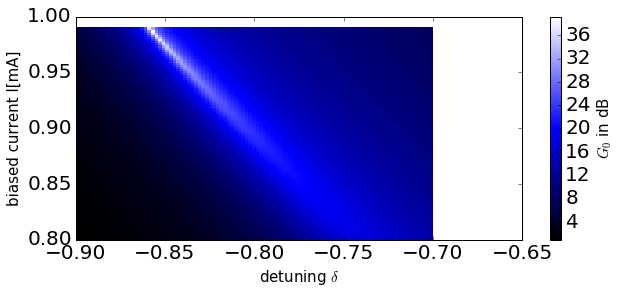

In [78]:
fig, axes = plt.subplots(figsize = (10,4))
p = axes.pcolor(X,Y,10.*np.log10(G(k,gamma,X,0,Y*ecrit,n1(X,Y*ecrit))), cmap = c_cmap)
cb = fig.colorbar(p, ax = axes)
axes.set_xlabel('detuning $\delta$', fontsize = 15)
axes.set_ylabel('biased current I[mA]', fontsize = 15)
#cb = plt.colorbar(cont)
cb.set_label('$G_0$ in dB', fontsize = 15)
plt.show()

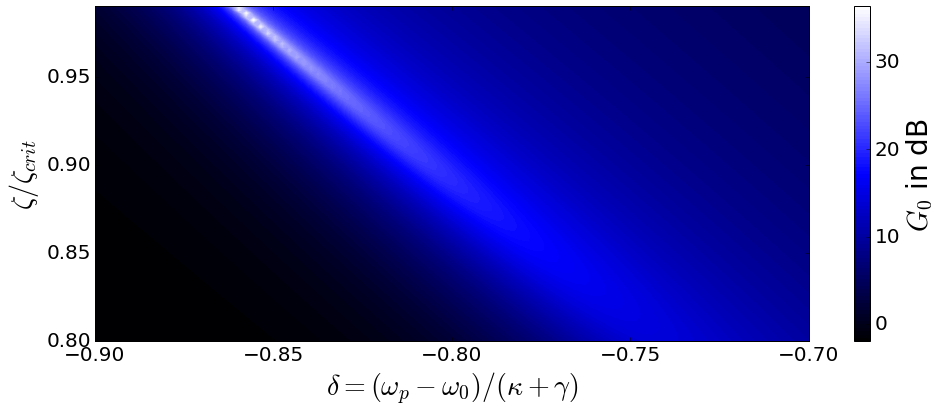

In [180]:
fig_2D, axes = plt.subplots(figsize = (16,6))
cont = axes.contourf(X,Y,10.*np.log10(G(k,0.4*k,X,0,Y*ecrit,n1(X,Y*ecrit))), 100, cmap = c_cmap)
axes.set_xlabel('$\delta = (\omega_p - \omega_0)/(\kappa + \gamma)$', fontsize = labelsize)
axes.set_ylabel(r'$\zeta/ \zeta_{crit}$', fontsize = labelsize)
cb = plt.colorbar(cont)
cb.set_ticks([0,10,20,30,40])
cb.set_label('$G_0$ in dB', fontsize = labelsize)
plt.show()

In [179]:
#fig_2D.savefig('eichler_gain_2D.pdf', dpi = 100, bbox_inches = 'tight')
fig_2D.savefig('eichler_gain_2D.png', dpi = 400, bbox_inches = 'tight')

In [81]:
e2 = np.linspace(0.6,1.10,100)
d2 = np.linspace(-1.0,-0.5,100)


X2, Y2 = np.meshgrid(d2,e2)

In [82]:
'''fig, axes = plt.subplots(figsize = (16,6))
cont = axes.contourf(X2,Y2,10.*np.log10(G(k,gamma,X2,0,Y2*ecrit,n1(X2,Y2*ecrit))), 300, cmap = c_cmap, vmin = 0, vmax = 40)
axes.set_xlabel('$\Delta$', fontsize = labelsize)
axes.set_ylabel(r'$\zeta/ \zeta_{crit}$', fontsize = labelsize)
cb = plt.colorbar(cont)
cb.set_ticks([0,10,20,30,40])
cb.set_label('$G_0$ in dB', fontsize = labelsize)
plt.show()'''

"fig, axes = plt.subplots(figsize = (16,6))\ncont = axes.contourf(X2,Y2,10.*np.log10(G(k,gamma,X2,0,Y2*ecrit,n1(X2,Y2*ecrit))), 300, cmap = c_cmap, vmin = 0, vmax = 40)\naxes.set_xlabel('$\\Delta$', fontsize = labelsize)\naxes.set_ylabel(r'$\\zeta/ \\zeta_{crit}$', fontsize = labelsize)\ncb = plt.colorbar(cont)\ncb.set_ticks([0,10,20,30,40])\ncb.set_label('$G_0$ in dB', fontsize = labelsize)\nplt.show()"

# gain over signal-pump detuning:

In [83]:
Delta = np.arange(-1.0,1.0,0.001)

In [84]:
gamma = 0.

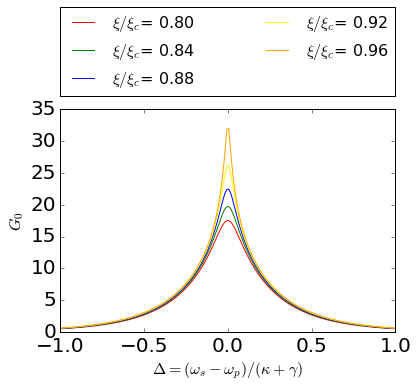

In [85]:
Delta = np.linspace(-1.0,1.0,200)
delta_s = np.linspace(-np.sqrt(3)/2.,-0.7,1000)
for idx,x in enumerate(my_range(0.8,1.,0.04)):
    e = x*ecrit
    delta_max = delta_s[np.argmax(G(k,gamma,delta_s,0,e,n1(delta_s,e)))]
    plt.plot(Delta,10.*np.log10(G(k,gamma,delta_max,Delta,e,n1(delta_max,e))), 'k', label = r"$\xi/\xi_c$" "= {0:.2f}".format(x), color = color[idx])
plt.xlabel('$\Delta = (\omega_s - \omega_p)/(\kappa + \gamma)$', fontsize = 16)
plt.ylabel('$G_0$', fontsize = 16 )
plt.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)
plt.show()


In [86]:
-np.sqrt(3)/2

-0.8660254037844386

In [87]:
zeta = np.linspace(0.4,0.90,10)

In [88]:
colors =cm.rainbow(np.linspace(0,1,20))

In [89]:
delta_s = np.linspace(-np.sqrt(3)/2.,-0.3,100)

In [90]:
print zeta


[ 0.4         0.45555556  0.51111111  0.56666667  0.62222222  0.67777778
  0.73333333  0.78888889  0.84444444  0.9       ]


(0, 25)

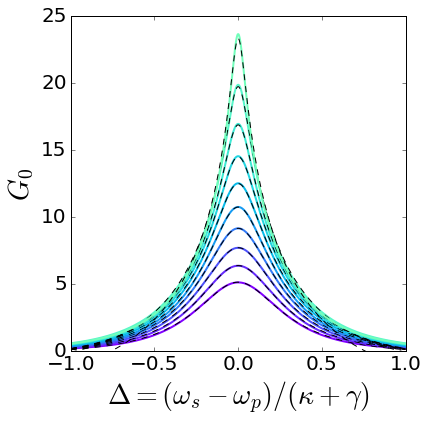

In [91]:
Delta = np.linspace(-1.0,1.0,1000)
fig, axes = plt.subplots(figsize = (6,6))
for idx,x in enumerate(zeta):
    e = x*ecrit
    delta_max = delta_s[np.argmax(G(k,gamma,delta_s,0,e,n1(delta_s,e)))]
    A1, A2, A3, A4, fr, Ql = _fit_skewed_lorentzian(Delta,G(k,gamma,delta_max,Delta,e,n1(delta_max,e)), ignoreslope = True)
    A2 = 0
    lorentzian = A1+A2*(Delta-fr)+(A3+A4*(Delta-fr))/(1.+4.*Ql**2*((Delta-fr)/fr)**2)
    axes.plot(Delta,10.*np.log10(G(k,gamma,delta_max,Delta,e,n1(delta_max,e))), 'k', label = r"$\xi/\xi_c$" "= {0:.2f}".format(x), color = colors[idx], lw = 2.)
    axes.plot(Delta, 10.*np.log10(lorentzian), color = 'black', ls = '--')
axes.set_xlabel('$\Delta = (\omega_s - \omega_p)/(\kappa + \gamma)$', fontsize = labelsize)
axes.set_ylabel('$G_0$', fontsize = labelsize )
axes.set_ylim(0,25)
#axes.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)



In [92]:
fig.savefig('eichler_gain_DELTA_fit.pdf', dpi = 100, bbox_inches = 'tight')

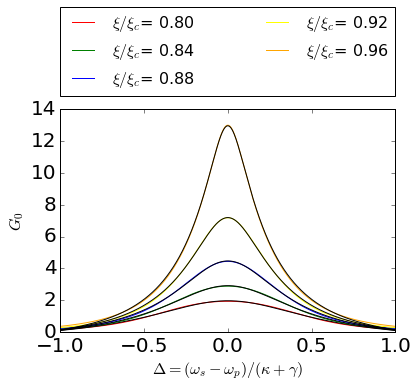

In [93]:
for idx,x in enumerate(my_range(0.8,1.,0.04)):
    e = x*ecrit
    A1, A2, A3, A4, fr, Ql = _fit_skewed_lorentzian(Delta,G(k,gamma,-0.86,Delta,e,n1(-0.86,e)), ignoreslope = True)
    lorentzian = A1+A2*(Delta-fr)+(A3+A4*(Delta))/(1.+4.*Ql**2*((Delta)/fr)**2)   
    plt.plot(Delta,10.*np.log10(G(k,gamma,-0.86,Delta,e,n1(-0.86,e))), 'k', label = r"$\xi/\xi_c$" "= {0:.2f}".format(x), color = color[idx])
    plt.plot(Delta, 10.*np.log10(lorentzian), color = 'black')
plt.xlabel('$\Delta = (\omega_s - \omega_p)/(\kappa + \gamma)$', fontsize = 16)
plt.ylabel('$G_0$', fontsize = 16 )
plt.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)
plt.show()


### introducing loss: gamma = 0.3*kappa

In [94]:
zeta2 = [0.95,0.96,0.97,0.98,0.99]

In [114]:
e = 0.90*ecrit

In [115]:
delta_max = delta_s[np.argmax(G(k,gamma,delta_s,0,e,n1(delta_s,e)))]

In [116]:
delta_2 = np.linspace(-0.866,-0.75,20)

In [117]:
G?

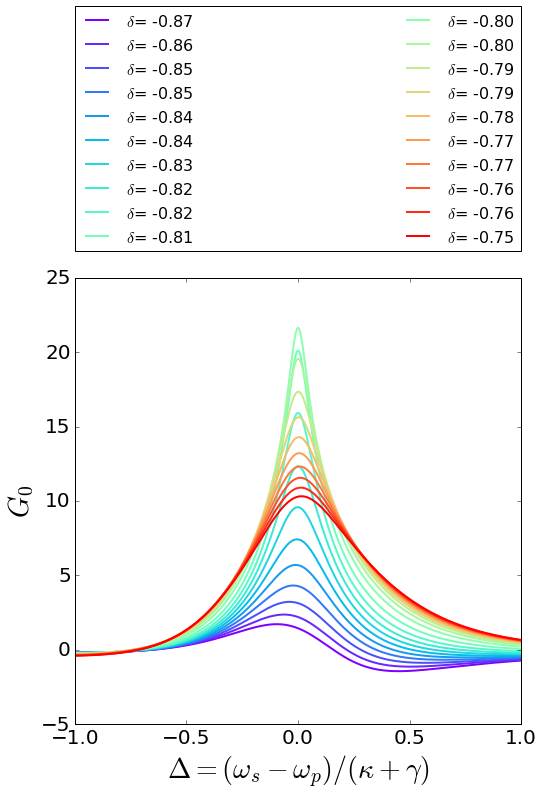

In [118]:
fig, axes = plt.subplots(figsize = (8,8))
colors = cm.rainbow(np.linspace(0,1,len(delta_2)))
for idx,x in enumerate(delta_2):
    #delta_max = delta_s[np.argmax(G(k,gamma,delta_s,0,e,n1(delta_s,e)))]
    axes.plot(Delta,10.*np.log10(G(k,0.3*k,x,Delta,e,n1(x,e))), 'k', label = r"$\delta$" "= {0:.2f}".format(x), color = colors[idx], lw = 2.)
axes.set_xlabel('$\Delta = (\omega_s - \omega_p)/(\kappa + \gamma)$', fontsize = labelsize)
axes.set_ylabel('$G_0$', fontsize = labelsize )
axes.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)



In [99]:
fig.savefig('eichler_gain_DELTA_loss.pdf', dpi = 400, bbox_inches = 'tight')

In [171]:
zeta3 = [0.50,0.76, 0.80,0.85, 0.88,0.90, 0.96]

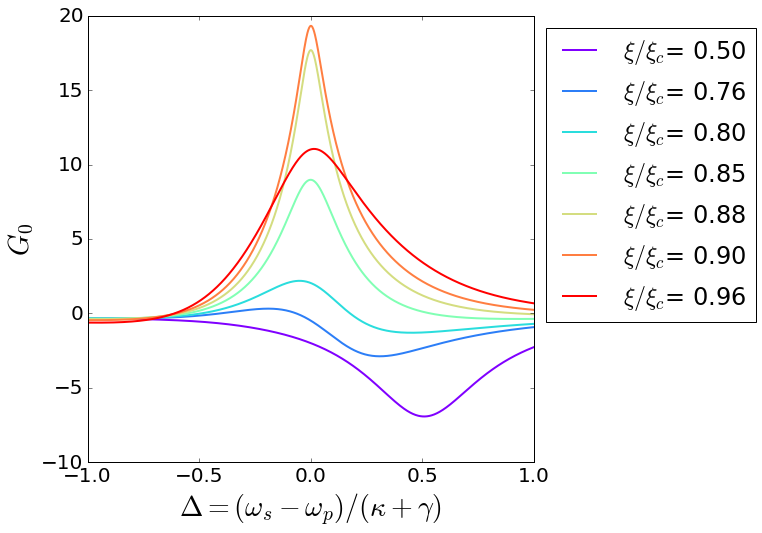

In [174]:
#introducing loss: 
#same pump frequency, different pump power
c = cm.rainbow(np.linspace(0,1,len(zeta3)))

gamma1 = 0.4*k

Delta = np.linspace(-1.0,1.0,1000)
fig, axes = plt.subplots(figsize = (8,8))
for idx,x in enumerate(zeta3):
    e = x*ecrit
    _delta = -0.80
    if x == zeta3[-1]:
        A1, A2, A3, A4, fr, Ql = _fit_skewed_lorentzian(Delta,G(k,gamma1,_delta,Delta,e,n1(_delta,e)), ignoreslope = True)
        lorentzian = A1+A2*(Delta-fr)+(A3+A4*(Delta-fr))/(1.+4.*Ql**2*((Delta-fr)/fr)**2)
    axes.plot(Delta,10.*np.log10(G(k,gamma1,_delta,Delta,e,n1(_delta,e))), 'k', label = r"$\xi/\xi_c$" "= {0:.2f}".format(x), color = c[idx], lw = 2.)
    #axes.plot(Delta, 10.*np.log10(lorentzian), color = 'black', ls = '--')
axes.set_xlabel('$\Delta = (\omega_s - \omega_p)/(\kappa + \gamma)$', fontsize = labelsize)
axes.set_ylabel('$G_0$', fontsize = labelsize )
#axes.set_ylim(0,25)
axes.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))



In [175]:
fig.savefig('eichler_gain_DELTA_loss.pdf', dpi = 400, bbox_inches = 'tight')

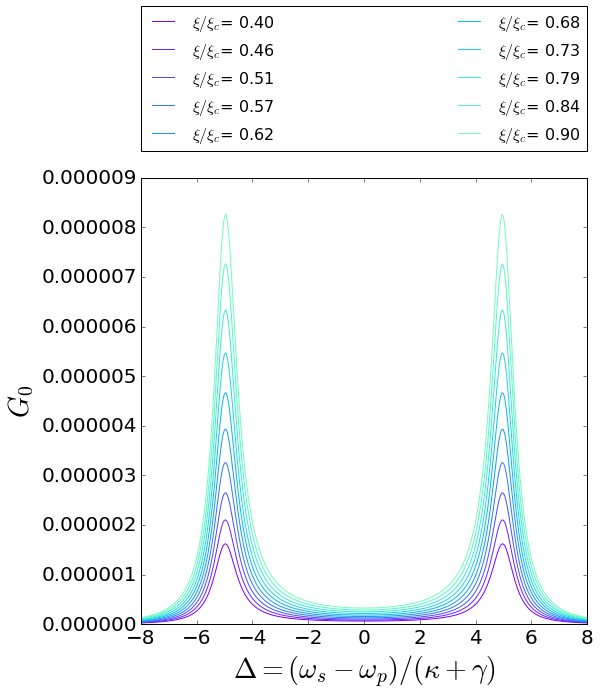

In [100]:
range1 = [0.3,0.6,0.8,0.95]
'''large detuning deltaa'''

Delta_L = np.linspace(-8,8.,300)

fig, axes = plt.subplots(figsize = (8,8))
for idx,x in enumerate(zeta):
    e = x*ecrit
    plt.plot(Delta_L,10.*np.log10(G(k,0.,-5,Delta_L,e,n1(-5,e))), 'k', label = r"$\xi/\xi_c$" "= {0:.2f}".format(x), color = colors[idx])
axes.set_xlabel('$\Delta = (\omega_s - \omega_p)/(\kappa + \gamma)$', fontsize = labelsize)
axes.set_ylabel('$G_0$', fontsize = labelsize )
axes.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)




In [101]:
delta = np.linspace(-1.5,0.99,300)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in power
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in sqrt
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in divide


(-1.5, 0.5)

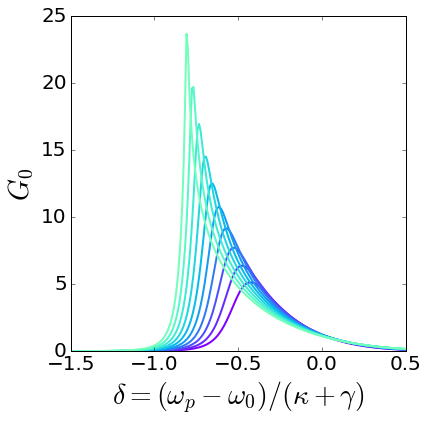

In [102]:
fig, axes = plt.subplots(figsize = (6,6))
for idx,x in enumerate(zeta):
    e = x*ecrit
    plt.plot(delta,10.*np.log10(G(k,gamma,delta,0,e,n1(delta,e))), 'k', label = r"$\xi/\xi_c$" "= {0:.2f}".format(x), color = colors[idx], lw = 2.)
axes.set_xlabel('$\delta = (\omega_p-\omega_0)/(\kappa + \gamma)$', fontsize = labelsize)
axes.set_ylabel('$G_0$', fontsize = labelsize )
axes.set_xlim(-1.5,0.5)
#axes.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)


In [103]:
fig.savefig('eichler_gain_d.pdf', dpi = 100, bbox_inches = 'tight')